In [1]:
from __future__ import print_function
import torch.nn as nn
import os
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from skimage import io, transform
import utils_xy
from torchvision import transforms, utils
import torch
import torch.nn.functional as F
import numpy as np

In [2]:
gpu_id = 1
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_id)

device = torch.device('cuda')
print (device)

cuda


### load and observe the data

In [3]:
my_dir = '/home/xiaoyu/ISBI'
my_data = os.listdir(my_dir)
train_label = my_data[0]
train_volume = my_data[1]
test_volume = my_data[2]
io.imread(os.path.join(my_dir,os.listdir(my_dir)[1])).shape

(30, 512, 512)

In [42]:
print("The train volume size is:" + str(io.imread(os.path.join(my_dir, train_volume)).shape))

The train volume size is:(30, 512, 512)


* Orginal training image, 8-bit grayscale, 512x512x30 pixels
* Training image labels (0 - membranes, 255 - non-membranes), 8-bit grayscale, 512x512x30 pixels
* Test image, 8-bit grayscale, 512x512x30 pixels

### Define the TrainDataset

In [43]:
class TrainDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
    def __len__(self):
        return len(io.imread(os.path.join(self.data_dir,os.listdir(self.data_dir)[1])))
    def __getitem__(self,idx):
        train_volume = io.imread(os.path.join(self.data_dir,os.listdir(self.data_dir)[1]))
        train_label = io.imread(os.path.join(self.data_dir,os.listdir(self.data_dir)[0]))
        img = transforms.ToTensor()(train_volume)
        label = transforms.ToTensor()(train_label)
        sample = {'volume':img,'label':label}
        
        return sample

In [44]:
def show_images(image, label):
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(label)
    plt.show()

0 torch.Size([512, 30, 512]) torch.Size([512, 30, 512])


TypeError: Invalid dimensions for image data

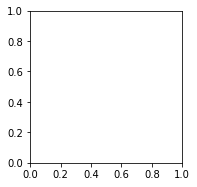

In [46]:
traindata = TrainDataset(data_dir = my_dir)
for i in range(len(traindata)):
    sample = traindata[i]
    print(i, sample['volume'].shape, sample['label'].shape)
    show_images(sample['volume'],sample['label'])
    if i == 1:  
        break

In [19]:
dataloader = DataLoader(traindata, batch_size = 2, shuffle = False, num_workers = 4)

In [25]:
for i_batch, sample_batched in enumerate(dataloader):
    print(sample_batched['volume'].size())
    if i_batch ==0:
        break

torch.Size([2, 512, 512])


In [37]:
for i_batch, sample_batched in enumerate(dataloader):
    volume_batch, label_batch = sample_batched['volume'], sample_batched['label']
    print(volume_batch.size())
    grid = utils.make_grid(volume_batch)
    
    if i_batch ==2:
        break

torch.Size([2, 512, 512])
torch.Size([2, 512, 512])
torch.Size([2, 512, 512])
torch.Size([2, 512, 512])
torch.Size([2, 512, 512])
torch.Size([2, 512, 512])
